In [97]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

% matplotlib inline


# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [8]:
vote = pd.read_csv("../assets/datasets/votes.csv")
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
Unnamed: 0    435 non-null int64
Class         435 non-null object
V1            423 non-null object
V2            387 non-null object
V3            424 non-null object
V4            424 non-null object
V5            420 non-null object
V6            424 non-null object
V7            421 non-null object
V8            420 non-null object
V9            413 non-null object
V10           428 non-null object
V11           414 non-null object
V12           404 non-null object
V13           410 non-null object
V14           418 non-null object
V15           407 non-null object
V16           331 non-null object
dtypes: int64(1), object(17)
memory usage: 61.2+ KB


In [13]:
#drop unnecessary column
vote.drop('Unnamed: 0', axis=1,inplace=True)

In [31]:
test = vote
test.dropna()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
26,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y
27,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
28,republican,y,n,n,y,y,n,y,y,y,n,n,y,y,y,n,y
29,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
30,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n


In [33]:
print len(vote), len(test.dropna())

435 232


In [14]:
vote.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [42]:
vote.columns

Index([u'Class', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16'],
      dtype='object')

Next, let's define the x and y variables: 

In [20]:
X = vote.drop('Class', axis=1)
y = vote['Class']

In [46]:
columns = ['V1', 'V2', 'V3','V4', 'V5','V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']
for i in columns:
    le = preprocessing.LabelEncoder()
    test[i] = le.fit_transform(X1[i])

In [49]:
print len(test)
test.head()


# 0 = NaN
# 1 = no
# 2 = yes

435


,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,democrat,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,democrat,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,democrat,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [50]:
X1 = test.drop('Class',axis=1)
y1 = test['Class']

In [52]:
X_standard = StandardScaler().fit_transform(X1)
print X_standard

[[-0.73990646  0.99312707 -1.02012586 ...,  0.81985252 -0.56593398
   0.73476529]
 [-0.73990646  0.99312707 -1.02012586 ...,  0.81985252 -0.56593398
  -1.63281175]
 [-2.57910251  0.99312707  0.81357145 ...,  0.81985252 -0.56593398
  -0.44902323]
 ..., 
 [-0.73990646 -2.00694428 -1.02012586 ...,  0.81985252 -0.56593398
   0.73476529]
 [-0.73990646 -0.50690861 -1.02012586 ...,  0.81985252 -0.56593398
   0.73476529]
 [-0.73990646  0.99312707 -1.02012586 ...,  0.81985252 -2.25210716
  -0.44902323]]


In [55]:
cov_mat = np.cov(X_standard.T)
print cov_mat

[[ 1.00230415  0.11354595  0.40131289 -0.25159828 -0.22779821 -0.28301659
   0.30612217  0.34300463  0.19878467 -0.03257432  0.15422141 -0.25625977
  -0.20527029 -0.22174552  0.23769484  0.01314704]
 [ 0.11354595  1.00230415  0.05843902  0.09622593  0.15001607  0.1397782
  -0.09889019 -0.09009232 -0.12063252  0.00242474  0.234045   -0.00178579
   0.16625009  0.01775204 -0.04859285  0.03371987]
 [ 0.40131289  0.05843902  1.00230415 -0.50789749 -0.46241466 -0.33076646
   0.53398216  0.62674947  0.4102598   0.07743231  0.20830173 -0.4142069
  -0.3903956  -0.41740793  0.41161877  0.026043  ]
 [-0.25159828  0.09622593 -0.50789749  1.00230415  0.71756028  0.45035392
  -0.39064671 -0.56154405 -0.38512712  0.10738417 -0.18877728  0.57023404
   0.45102204  0.54817327 -0.33179062  0.05622505]
 [-0.22779821  0.15001607 -0.46241466  0.71756028  1.00230415  0.56050966
  -0.4594824  -0.60794551 -0.52081567  0.05668092 -0.06981909  0.50164236
   0.50338403  0.58250718 -0.36670103  0.04980214]
 [-0.28

Now, let's check the eigenvalues and eigenvectors: 

In [91]:
sum(eigenValues)

16.036866359447011

In [56]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [62]:
print "values: ",eigenValues,"\n\nvectors: ", eigenVectors

values:  [ 5.65752002  1.66918439  1.36217169  0.90935585  0.8542137   0.82725751
  0.74212482  0.22892528  0.26715979  0.65567005  0.583594    0.55967802
  0.37200846  0.48444615  0.4579934   0.40556323] 

vectors:  [[  1.87536754e-01  -1.72191173e-01   2.71895327e-01   5.19476546e-01
   -3.03594311e-01  -3.77384233e-01   2.73498355e-01   6.44728844e-03
    3.49246408e-02  -3.25988405e-01  -1.71497030e-01   1.83936942e-01
    1.58051030e-01   1.71300011e-01   2.38374735e-01  -9.34853728e-03]
 [ -4.74950647e-02  -2.53205522e-01   5.74448925e-01   3.31062868e-01
    6.16490566e-02   4.13836145e-01  -2.46700476e-01  -5.85048402e-02
    3.21156927e-02   3.88208454e-01   8.94209068e-02   5.66055231e-02
    9.84657578e-02  -1.14519979e-02  -2.53130378e-02  -2.85109068e-01]
 [  3.04655704e-01  -2.14679338e-01   1.18349800e-01   3.19131639e-02
   -2.27933947e-01   3.46489439e-02   1.71622108e-02   1.43017377e-01
    2.26018027e-01  -5.42712577e-02   2.09822204e-01  -4.29715461e-01
   -6.72531

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [66]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
print eigenPairs

[(5.6575200173127014, array([ 0.18753675, -0.04749506,  0.3046557 , -0.32612627, -0.34343543,
       -0.28567465,  0.29557085,  0.33348347,  0.27130047, -0.01621182,
        0.06501091, -0.27620977, -0.26832785, -0.29190741,  0.23167742,
        0.00050634])), (1.6691843859448152, array([-0.17219117, -0.25320552, -0.21467934, -0.11123856, -0.13083796,
       -0.20404074, -0.22386287, -0.19509095, -0.12905621, -0.44007935,
       -0.37059127, -0.18194454, -0.23113765, -0.2316641 , -0.21723267,
       -0.40718512])), (1.3621716945087212, array([ 0.27189533,  0.57444893,  0.1183498 , -0.11781826,  0.05402359,
        0.08291014, -0.21556183, -0.12350203, -0.26754601, -0.31491164,
        0.46483017, -0.1362295 ,  0.00543157, -0.14093589,  0.03900407,
       -0.26437046])), (0.90935585129351471, array([ 0.51947655,  0.33106287,  0.03191316,  0.21772597,  0.14941244,
       -0.24935684,  0.12565425, -0.01592397,  0.07430652, -0.16564819,
       -0.49802432, -0.12500142,  0.07217332,  0.0288

In [71]:
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print i[0]

5.65752001731
1.66918438594
1.36217169451
0.909355851294
0.854213700084
0.827257505656
0.742124815195
0.655670051019
0.583594002845
0.559678017884
0.484446150212
0.457993401366
0.405563227146
0.372008463748
0.267159791989
0.228925283245


Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [90]:
totalEigen

16.036866359447011

In [104]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]
cumulativevarExpl = np.cumsum(varExpl)


In [105]:
cumulativevarExpl

array([  35.2782139 ,   45.68663378,   54.18063544,   59.85104405,
         65.17760649,   70.33608002,   74.9636974 ,   79.05221467,
         82.69129222,   86.18123848,   89.20206648,   92.05794488,
         94.58688799,   96.90659594,   98.57250614,  100.        ])

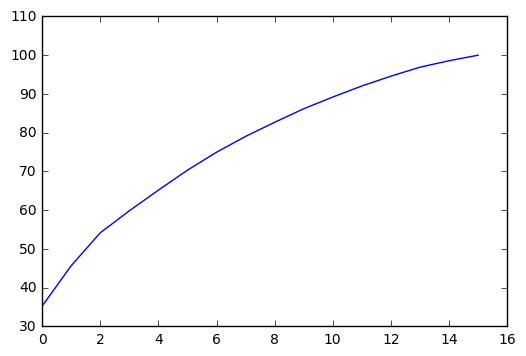

In [98]:
plt.plot(cumulativevarExpl)

In [77]:
Pmatrix = np.hstack((eigenPairs[0][1].reshape(16,1),
                      eigenPairs[1][1].reshape(16,1)))

In [83]:
Y = X_standard.dot(Pmatrix)

Now, conduct the PCA using scikit learn

In [88]:
pcask = PCA(n_components=2)
y_sk = pcask.fit_transform(X_standard)

# Case #2: Airport Delays

In [89]:
air = pd.read_csv('../assets/datasets/Airport_operations.csv')

First, let's define the x and y variables: Airport is going to be our "x" variable

In [92]:
air.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


Then, standardize the x variable for analysis

In [111]:
X2 = air.drop('airport',axis=1)
y = air['airport']

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [112]:
X_standard = StandardScaler().fit_transform(X2)
print X_standard

[[-1.59402353 -0.55269892 -0.55179125 ..., -0.58849731 -0.76079377
  -0.70168278]
 [-1.27702807 -0.57450712 -0.57162597 ..., -0.52044906 -0.9654201
  -0.84232194]
 [-0.96003261 -0.59636622 -0.57855433 ..., -0.57715593 -0.65360855
  -0.48960786]
 ..., 
 [ 0.94194013 -1.05379873 -1.05283011 ..., -1.52983138  0.49619655
   3.2161224 ]
 [ 1.25893558 -1.04012533 -1.03874858 ..., -1.52983138 -0.41000577
   3.07548324]
 [ 1.57593104 -1.02672683 -1.02436048 ..., -1.52983138  0.5449171
   3.33890262]]


In [113]:
cov_mat = np.cov(X_standard.T)
print cov_mat

[[ 1.00119048 -0.06920457 -0.06826954  0.01430972  0.05008518  0.09204365
   0.02317489 -0.0430656  -0.154516   -0.02867646 -0.32755534 -0.03635544
  -0.31670106 -0.05966818]
 [-0.06920457  1.00119048  1.00100766  0.12231773 -0.16437507  0.20939557
  -0.05539575  0.6537683   0.62938398  0.20681577  0.33684867  0.83124203
   0.29425884 -0.0557856 ]
 [-0.06826954  1.00100766  1.00119048  0.12232288 -0.16397662  0.20945784
  -0.0560545   0.65186846  0.62868998  0.20597707  0.3357403   0.83028795
   0.29142547 -0.05643154]
 [ 0.01430972  0.12231773  0.12232288  1.00119048  0.89738628  0.92193022
  -0.96154118  0.03483233  0.1128457  -0.83082066 -0.35322638  0.15621044
  -0.4029288  -0.8611695 ]
 [ 0.05008518 -0.16437507 -0.16397662  0.89738628  1.00119048  0.84392401
  -0.90736639 -0.37144092 -0.33217912 -0.9651923  -0.56491312 -0.15533702
  -0.57543726 -0.86601541]
 [ 0.09204365  0.20939557  0.20945784  0.92193022  0.84392401  1.00119048
  -0.91469309 -0.01736132  0.05063063 -0.81034427 -

Then, check your eigenvalues and eigenvectors:

In [114]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [115]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
print eigenPairs

[(6.4534960079102319, array([-0.05747614,  0.11683294,  0.1164079 , -0.31455588, -0.37512831,
       -0.31944346,  0.3394426 ,  0.20370273,  0.17921314,  0.38208105,
        0.26636432,  0.11754539,  0.292669  ,  0.3500623 ])), (4.3095237244909841, array([ 0.05252557, -0.41190929, -0.41158191, -0.25353041, -0.07870829,
       -0.25961871,  0.21205574, -0.35157249, -0.36563423,  0.04418206,
       -0.1225854 , -0.4016139 , -0.0920439 ,  0.17689915])), (1.218248788447476, array([ 0.80890976,  0.16980855,  0.17108429, -0.11887711, -0.10089244,
        0.01437277,  0.14698731,  0.01467519, -0.07924788,  0.11203106,
       -0.33705618,  0.16814201, -0.2829519 ,  0.02122267])), (0.73787539358931009, array([-0.38914338,  0.40257614,  0.40387107, -0.22456082, -0.0109185 ,
       -0.0559417 ,  0.12087295, -0.43649882, -0.42686047, -0.07037202,
       -0.19371794,  0.18814637, -0.05923421, -0.0312063 ])), (0.51095455771136955, array([-0.01517249, -0.12274015, -0.12540936,  0.12369052,  0.1346245

In [116]:
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print i[0]

6.45349600791
4.30952372449
1.21824878845
0.737875393589
0.510954557711
0.349353221606
0.166799275189
0.120220515247
0.0732036814776
0.0641924375551
0.0095907458676
0.00234264664452
0.000701306545385
0.00016436438493


Next, Calculate the explained variance

In [118]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]
cumulativevarExpl = np.cumsum(varExpl)


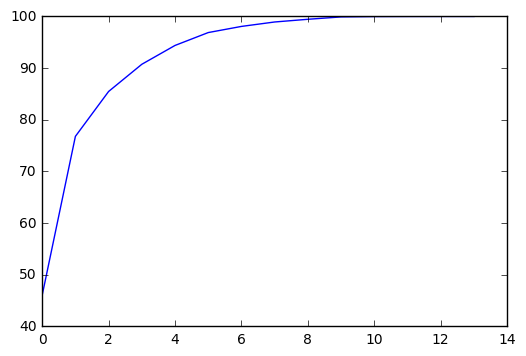

In [119]:
plt.plot(cumulativevarExpl)

Finally, conduct the PCA - use the results about to guide your selection of "n" componants

In [121]:
pcask = PCA(n_components=2)
y_sk = pcask.fit_transform(X_standard)